In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('time_series.csv', index_col=0)

In [4]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [6]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   object        
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [9]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [11]:
df_os = df[df['Category'] == 'Office Supplies'].copy()

In [12]:
df_os.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
7,CA-2015-115812,2015-09-06,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280
9,CA-2015-115812,2015-09-06,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504
10,CA-2015-115812,2015-09-06,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900


In [13]:
df_os.shape

(5909, 17)

In [14]:
df_os = df_os[['Order Date', 'Sales']]
df_os.head()

,Order Date,Sales
Row ID,,
3,2017-12-06,14.620
5,2016-11-10,22.368
7,2015-09-06,7.280
9,2015-09-06,18.504
10,2015-09-06,114.900


In [15]:
df_os.sort_values('Order Date')

,Order Date,Sales
Row ID,,
6549,2015-01-03,17.472
7948,2015-01-03,18.840
7951,2015-01-03,129.552
8310,2015-01-03,137.352
1374,2015-01-04,17.088
...,...,...
5092,2018-12-30,3.024
646,2018-12-30,209.300
1298,2018-12-30,20.720


In [16]:
df_os = df_os.groupby('Order Date').sum()
df_os.head()

,Sales
Order Date,
2015-01-03,303.216
2015-01-04,119.888
2015-01-06,2282.530
2015-01-07,25.104
2015-01-08,184.200


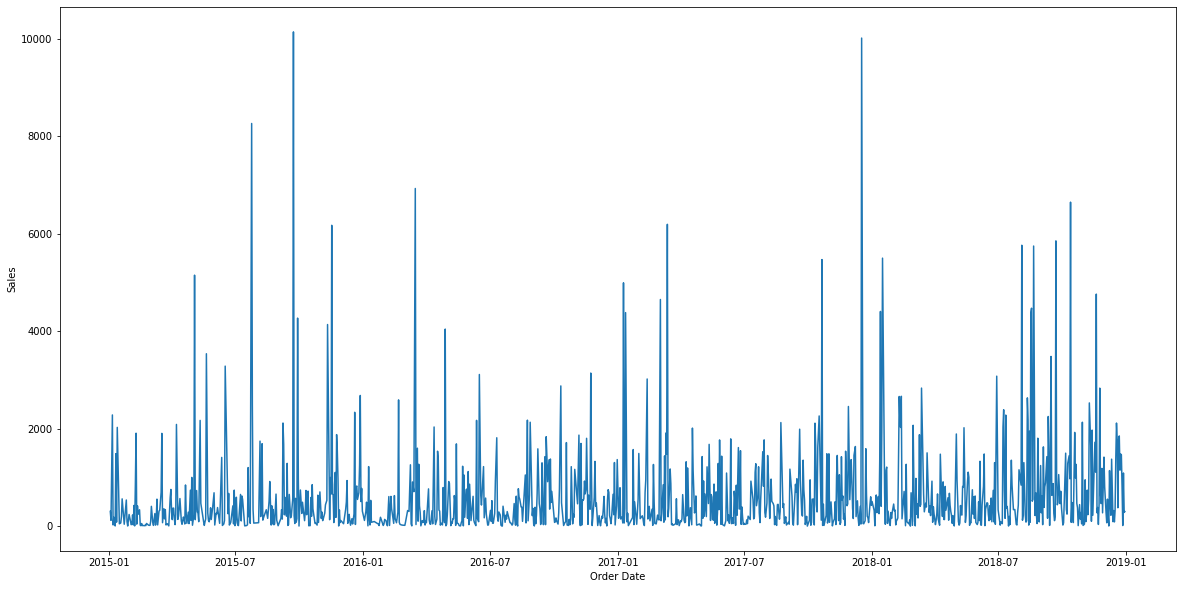

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(x=df_os.index, y=df_os['Sales']);

In [18]:
df_os = df_os.resample('MS').mean() # MS: Month Start
df_os

,Sales
Order Date,
2015-01-01,442.918737
2015-02-01,218.343909
2015-03-01,302.427250
2015-04-01,352.387750
2015-05-01,698.627304
2015-06-01,504.030905
2015-07-01,725.808818
2015-08-01,439.934474
2015-09-01,988.528962


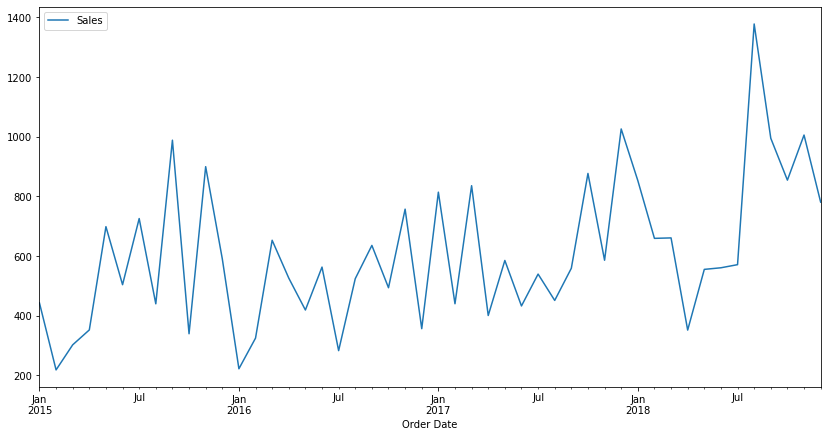

In [66]:
df_os.plot(figsize=(14,7));

In [20]:
from fbprophet import Prophet

In [21]:
data = df_os.reset_index()

In [22]:
data.columns = ['ds', 'y']

In [23]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = model.make_future_dataframe(periods=30, freq='MS')

In [25]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,404.074246,206.148711,622.763760
1,2015-02-01,314.762180,94.748216,544.169998
2,2015-03-01,440.037951,239.421290,664.464029
3,2015-04-01,264.488691,46.394825,466.988788
4,2015-05-01,550.564915,322.384309,754.122903


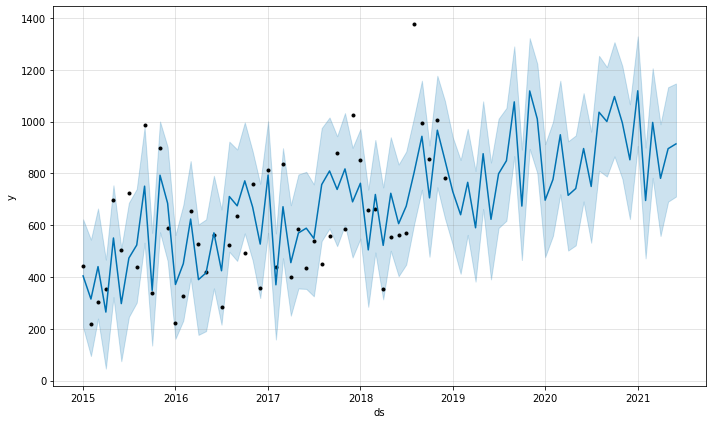

In [26]:
model.plot(forecast)
plt.show()

In [27]:
df_os.head()

,Sales
Order Date,
2015-01-01,442.918737
2015-02-01,218.343909
2015-03-01,302.427250
2015-04-01,352.387750
2015-05-01,698.627304


In [28]:
new_df = df_os[:'2017']

In [29]:
new_df = new_df.reset_index()

In [30]:
new_df.columns = ['ds', 'y']

In [31]:
new_df

,ds,y
0,2015-01-01,442.918737
1,2015-02-01,218.343909
2,2015-03-01,302.427250
3,2015-04-01,352.387750
4,2015-05-01,698.627304
5,2015-06-01,504.030905
6,2015-07-01,725.808818
7,2015-08-01,439.934474
8,2015-09-01,988.528962
9,2015-10-01,339.506087


In [32]:
model = Prophet()

In [33]:
model.fit(new_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = model.make_future_dataframe(periods=12, freq='MS')

In [35]:
pred = model.predict(future)

In [36]:
pred = pred[['ds', 'yhat']]

In [37]:
pred.set_index('ds', inplace=True)

In [38]:
pred.head()

,yhat
ds,
2015-01-01,411.983499
2015-02-01,301.237415
2015-03-01,467.507983
2015-04-01,364.206843
2015-05-01,664.095285


In [39]:
pred = pred['2018':]

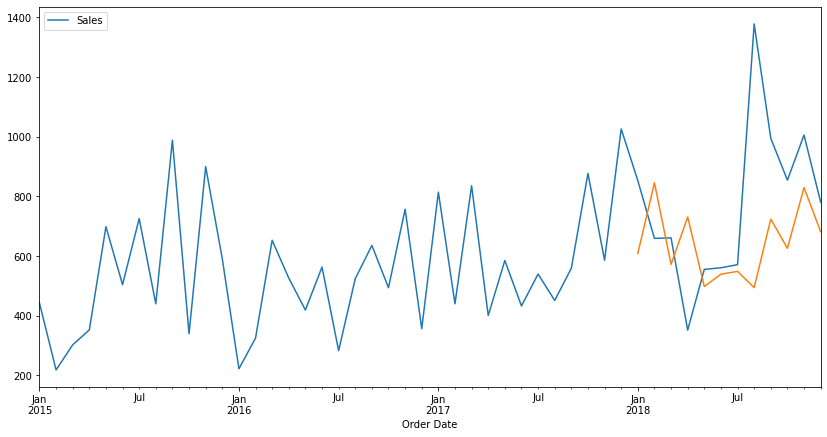

In [67]:
ax = df_os.plot()
pred.plot(ax=ax, figsize=(14,7));

In [41]:
pred = model.predict(future)

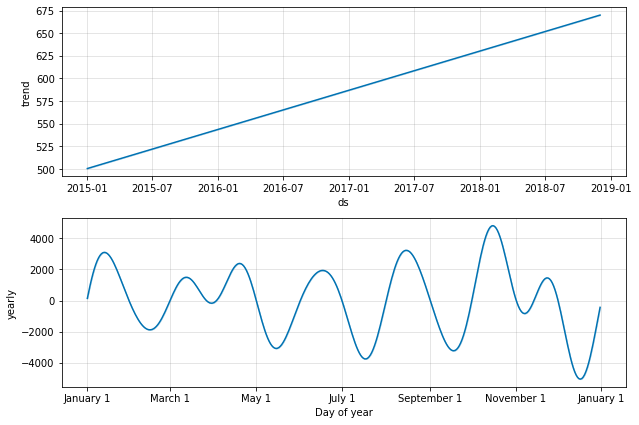

In [42]:
model.plot_components(pred)
plt.show()

---

In [43]:
df_os.head()

,Sales
Order Date,
2015-01-01,442.918737
2015-02-01,218.343909
2015-03-01,302.427250
2015-04-01,352.387750
2015-05-01,698.627304


In [44]:
new_df = df_os[:'2017']

In [45]:
from statsmodels.tsa.ar_model import AutoReg

In [46]:
model = AutoReg(new_df, lags=12)

In [47]:
model_fit = model.fit()

In [48]:
len(new_df)

36

In [50]:
pred = model_fit.predict(start=len(new_df), end=len(new_df)+11)

In [52]:
pred

2018-01-01    608.926229
2018-02-01    845.719037
2018-03-01    571.957826
2018-04-01    731.260325
2018-05-01    497.873469
2018-06-01    539.243996
2018-07-01    548.694393
2018-08-01    494.219752
2018-09-01    724.059630
2018-10-01    626.062725
2018-11-01    829.607938
2018-12-01    681.935551
Freq: MS, dtype: float64

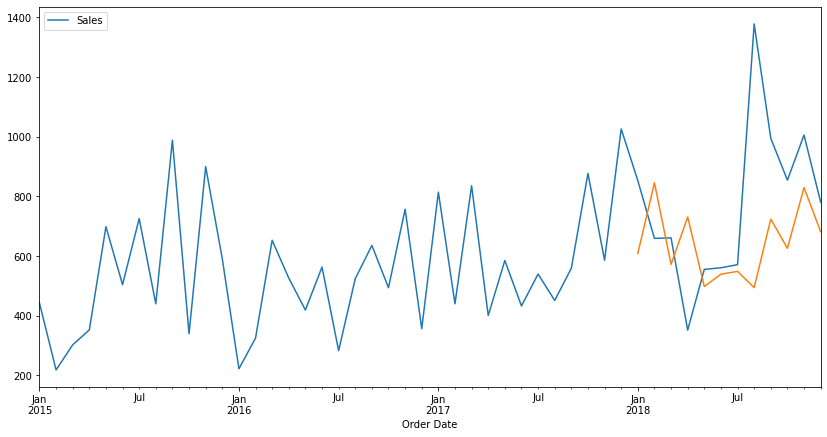

In [69]:
ax = df_os.plot()
pred.plot(ax=ax, figsize=(14,7));